# Archimidean Spiral: Geometry


In [1]:
#Librerias
import archimedes as ach
#import matplotlib.pyplot as plt
import pylab as plt
import scipy.interpolate as interpolate
import numpy as np
from scipy.integrate import simps
from scipy import interpolate 
from filon import cos_integral


In [2]:
nc0 = 5 # cicles number
ns0 = 20   # Subdivisiones en el intervalo de phi h
NP0 = 1000  # número de subsubintervalos para integrar
a0 = 2.0 
b0 = 2.0 
Long_arc_0,phi_0 =  ach.Arc_Lenght(ns0,nc0,NP0,a0,b0)
Ss= Long_arc_0
RS = ach.rads(a0,b0,phi_0)
XS = ach.xss(a0,b0,phi_0)
YS = ach.yss(a0,b0,phi_0)

sf_0 = Long_arc_0[-1]

Nelectron=501

theta_0 = 0.0
F_grid_0 = np.array([0.0, 0.5 ,2.0 ]) #np.linspace(0, 2.0, 50)
camp_F_0 = ach.CAMP(F_grid_0)
#---------------------------------------------------------------------------------------------------------------
SD_grid_0 =  np.array([ach.ssfi(4*np.pi,Long_arc_0,phi_0)]) #0.2*sf_0, 0.4*sf_0, 0.8*sf_0 
#---------------------------------------------------------------------------------------------------------------
VS_0,kindex_0,SE_grid_0,SD_SF_0,Ndonor_0,phie_0,NF_0 =  ach.int_vpot(sf_0,Nelectron,SD_grid_0,camp_F_0,theta_0,a0,b0,Long_arc_0,phi_0)
#COEF_0= ach.coef(VS_0,kindex_0,sf_0,NF_0,Nelectron,Ndonor_0)
#Ee_0,VecR_0,ND =  ach.schr(COEF_0,sf_0,NF_0,Nelectron,Ndonor_0)

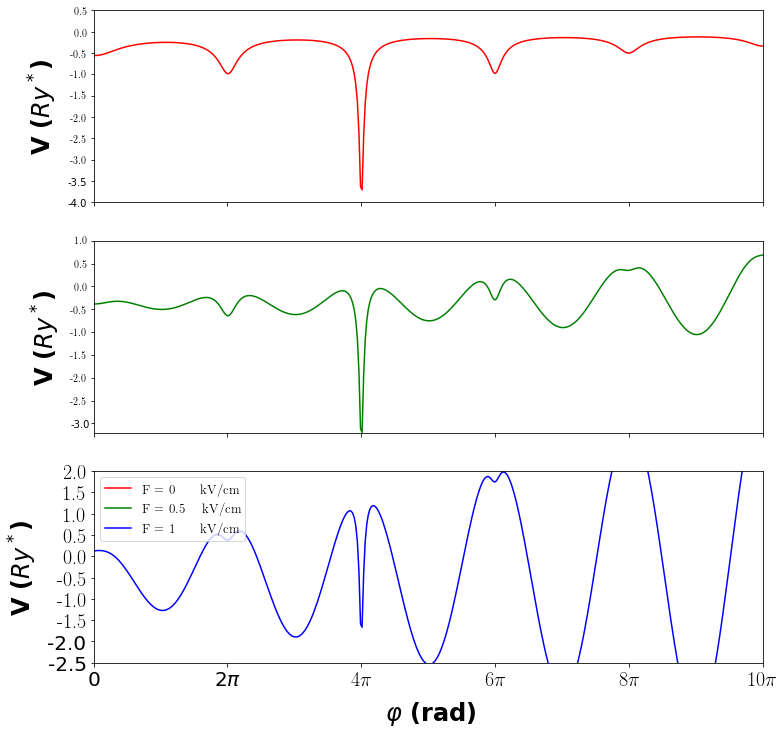

In [3]:
f, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12,12),sharex=True)#,sharex=True, sharey=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
l1,=ax1.plot(phie_0,VS_0[0,0,:], color='r', label='Blue stars')
l2,=ax2.plot(phie_0,VS_0[1,0,:], color='g')
l3,=ax3.plot(phie_0,VS_0[2,0,:], color='b')
plt.xticks([0,  2*np.pi,  4*np.pi, 6*np.pi, 8*np.pi, 10*np.pi],
           ['$0$',  r'$2\pi$', r'$4\pi$', r'$6\pi$',r'$8\pi$', r'$10\pi$',],fontsize=20)

ax1.set_ylim(-4,0.5)
ax2.set_ylim(-3.2,1)
ax3.set_ylim(-2.5,2)

plt.xlabel(r' $\varphi$ (rad) ', labelpad=10,fontsize=24,fontweight='bold', horizontalalignment='center')           
        
ax1.set_ylabel(r'V ($Ry^*$)',labelpad=8,fontsize=24,fontweight='bold', horizontalalignment ='center')
ax2.set_ylabel(r'V ($Ry^*$)',labelpad=8,fontsize=24,fontweight='bold', horizontalalignment ='center')
ax3.set_ylabel(r'V ($Ry^*$)',labelpad=8,fontsize=24,fontweight='bold', horizontalalignment ='center')

plt.xlim(0, phie_0.max())
#plt.ylim(-4,1.5)
plt.yticks(fontsize=20)


plt.legend([l1, l2, l3],["F = 0 \,\, \quad kV/cm", "F = 0.5 \, \,  kV/cm", "F = 1 \,\, \quad kV/cm"], loc=(2), fontsize=13)
#plt.savefig('Arc_DOS_ESab2.pdf',format='pdf', dpi=1000,bbox_inches="tight")
#plt.savefig('Vpot0-4.png',format='png', dpi=1000,bbox_inches="tight")
plt.show()

In [237]:
ach.ssfi(7.4*np.pi,Long_arc_0,phi_0)/sf_0

0.6029087816819139

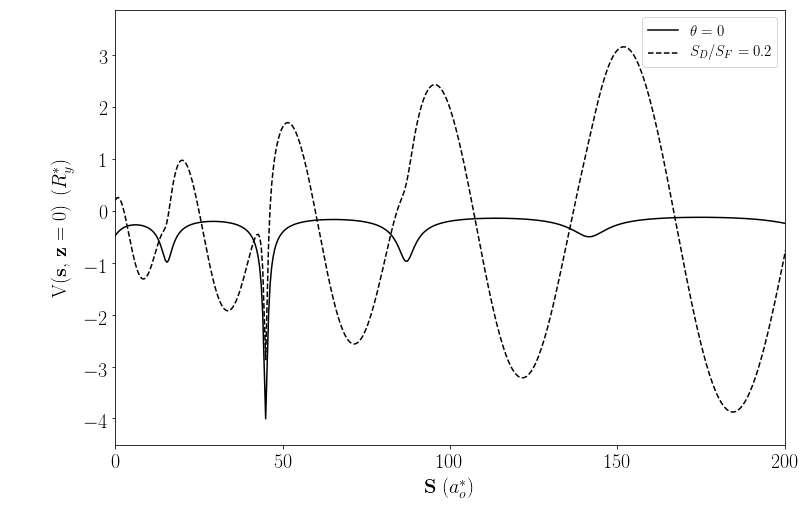

In [343]:

x=  SE_grid_0  #Long_arc
y1= VS_0[0,0,:]  
y2= VS_0[2,0,:]

fig=plt.figure(figsize=(12,8) )#pi=1000)
ax = fig.add_subplot(1, 1, 1)

plt.xlabel(r'\textbf{S} ($ a_o^*$)',labelpad=10,fontsize=20,fontweight='bold', horizontalalignment ='center')
plt.ylabel(r'V(\textbf{s}, \textbf{z} = 0)\,  ($R_y^*$)',labelpad=8,fontsize=20,fontweight='bold', horizontalalignment ='center')
plt.rc('text', usetex=True)
plt.rc('font', family='DejaVu Sans')
plt.rc('axes', labelsize=20)

label_x = 155
label_y = 8
arrow_x = 105
arrow_y = 20.05

arrow_properties = dict(
   facecolor="black", width=0.8,
    headwidth=5, shrink=0.05)


plt.annotate("$ \mathbf{\\tilde{\\varphi}(s)}$", xy=(111,21), xytext=(100, 60.6),
            arrowprops=dict(facecolor='black', shrink=0.07, width=0.6,    headwidth=8), size=18)

plt.annotate(" R$\mathbf{_s(s)}$", xy=(140,10), xytext=(153, 12.5),
            arrowprops=dict(facecolor='black',width=0.6, shrink=0.07,   headwidth=8),size=18)

plt.plot(x,y1,linestyle='-',label= '\, $\\theta = 0$' , color= 'black' ) # F = 0 kV/cm
plt.plot(x,y2,linestyle='--',label= ' \, $S_D/S_F= 0.2$', color= 'black'  ) # F = 2 kV/cm',


ax.set_xlim(0, 200)
ax.set_ylim(y1.min()-0.5,y2.max())


plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

length = 200
xmarks=[i for i in range(0,length+1,50)]
plt.xticks(xmarks)

plt.legend(loc=(0), fontsize=15)


#plt.savefig('cartesian.pdf',format='pdf', dpi=1000,bbox_inches="tight")


#plt.savefig('fi=0_vpot02-cl.png',format='png', dpi=1000,bbox_inches="tight")
#plt.savefig('Arc_vpotsd0-2.pdf',format='pdf', dpi=1000,bbox_inches="tight")
plt.show()


In [322]:
NP= 400
Phi=np.zeros(NP)
Rs=np.zeros(NP)
Xs=np.zeros(NP)
Ys=np.zeros(NP)
Ss=np.zeros(NP)
s= np.linspace(0, sf_0, NP)
for j in range(1,NP+1):
    ss = s[j-1]
    Phi[j-1] = ach.fiss(ss,Long_arc_0,phi_0)
    Rs[j-1] = ach.rads(a0,b0,Phi[j-1])
    Xs[j-1] = ach.xss(a0,b0,Phi[j-1])
    Ys[j-1] = ach.yss(a0,b0,Phi[j-1])
    Ss[j-1] = ss

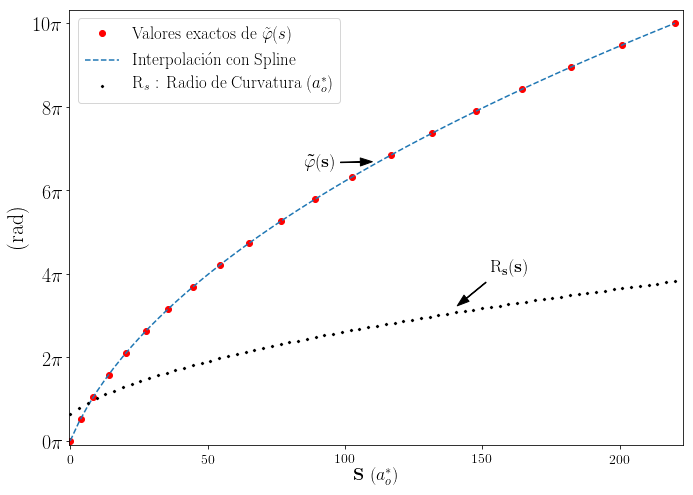

In [158]:
x= Long_arc_0
y= phi_0


fig=plt.figure(figsize=(11,8) )
ax = fig.add_subplot(1, 1, 1)

plt.xlabel(r'\textbf{S} ($ a_o^*$)', fontsize=18)
plt.ylabel('(rad)', fontsize=22)
plt.rc('text', usetex=True)
plt.rc('font', family='DejaVu Sans')
plt.rc('axes', labelsize=22)

plt.plot(Long_arc_0,phi_0,'ro',label= 'Valores exactos de $\\tilde{\\varphi}(s)$')
plt.plot(Ss,Phi,linestyle='--',label=r"Interpolaci\'on con Spline")

plt.plot(Ss,Rs,'D',color = 'black',markersize=1.8,label='R$_s$ : Radio de Curvatura ($a_o^* $)')#label='Ángulo Polar dado por la interpolación con Spline')

label_x = 155
label_y = 8
arrow_x = 105
arrow_y = 20.05

#arrow_properties = dict(
 #   facecolor="black", width=0.8,
#    headwidth=5, shrink=0.05)


plt.annotate("$ \mathbf{\\tilde{\\varphi}(s)}$", xy=(111,21), xytext=(85, 20.6),
            arrowprops=dict(facecolor='black', shrink=0.07, width=0.6,    headwidth=8), size=18)

plt.annotate(" R$\mathbf{_s(s)}$", xy=(140,10), xytext=(153, 12.5),
            arrowprops=dict(facecolor='black',width=0.6, shrink=0.07,   headwidth=8),size=18)
ax.set_xlim(-0.3, x.max() + 3 )
ax.set_ylim(-0.3, y.max() + 1 )

x_pi   = y/np.pi
unit   = 1
y_tick = np.arange(0, 10+unit, 2*unit)
y_label = [r"$" + format(r, ".2g")+ r"\pi$" for r in y_tick] # [r"$0$", r"$3 \pi$", r"$6\pi$", r"$9\pi$" ]#,   r"$+\frac{\pi}{2}$"]
ax.set_yticks(y_tick*np.pi)
ax.set_yticklabels(y_label, fontsize=20)
#ax.set_xticklabels(x_ticks, fontsize=18)
plt.rc('xtick', labelsize=20)

length = 200
xmarks=[i for i in range(0,length+1,50)]

plt.xticks(xmarks)

plt.legend(loc=(0), fontsize=17)
#plt.legend(('Valores exactos', "Aproximaci$\'{o}$n", ' Radio de Curvatura ($a_o^* $)'), loc=(0), fontsize=15)
#plt.savefig('Rs.png', format='png', dpi=1000)

#plt.savefig('Rs.pdf',format='pdf', dpi=1000,bbox_inches="tight")
#plt.savefig('Rs.png', format='png', dpi=1000)

plt.show()

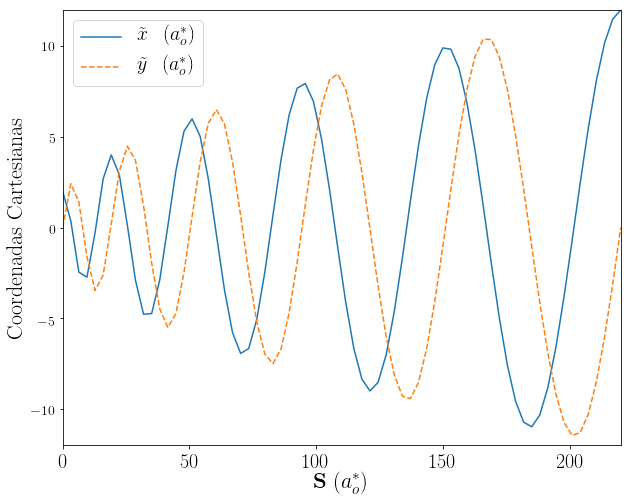

In [159]:
x=  Ss  #Long_arc
y1= Ys
y2= Xs


fig=plt.figure(figsize=(10,8) )#pi=1000)
ax = fig.add_subplot(1, 1, 1)
plt.rc('text', usetex=True)
plt.rc('font', family='DejaVu Sans')

plt.xlabel(r'\textbf{S} ($ a_o^*$)', fontsize=22)
plt.ylabel('Coordenadas Cartesianas', fontsize=22)

#plt.rc('font', family='serif')
#plt.rc('axes', labelsize=20)


plt.plot(x,y2,linestyle='-',label= '$\\tilde{x}$  \, ($a_o^* $)'  )
plt.plot(x,y1,linestyle='--',label= '$\\tilde{y}$  \, ($a_o^* $)'  )

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
ax.set_xticks(ax.get_xticks()[::1])
#ax.set_xticklabels(x_ticks, fontsize=18)
ax.set_xlim(0, x.max() )
ax.set_ylim(y2.min()-1, y2.max() )


plt.legend(loc=(0), fontsize=20)
#plt.legend(('Valores exactos', "Aproximaci$\'{o}$n", ' Radio de Curvatura ($a_o^* $)'), loc=(0), fontsize=15)
#plt.savefig('Rs.png', format='png', dpi=1000)

#plt.savefig('cartesian.pdf',format='pdf', dpi=1000,bbox_inches="tight")

#plt.savefig('cartesian.png', format='png', dpi=1000)

plt.show()

In [319]:
SD_grid_0, ach.xss(a0,b0,6*np.pi), ach.yss(a0,b0,6*np.pi), ach.ssfi(6*np.pi,Long_arc_0,phi_0)

(array([94.46794596]), 8.0, -5.878304635907295e-15, array(94.46794596))

C:\Users\USUARIO\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


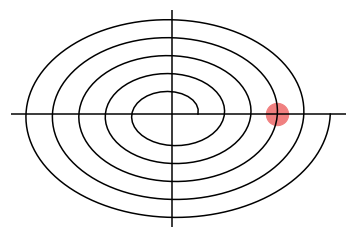

In [323]:

plt.plot(Xs,Ys, color="black", linewidth=1.5, linestyle="-")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.scatter(8.0, -5.878304635907295e-15, s=500, color='lightcoral')
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='off')
plt.box(False)
#plt.title( 'a=2 \, b=2.0 \, nf= 5')
#plt.grid(True)
plt.savefig('spiral_s6p.pdf',format='pdf', dpi=1000,bbox_inches="tight")

In [345]:
SD_SF_0

array([0.2039919])